In [9]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.cluster import SpectralClustering

In [10]:
dataset = pd.read_csv('clustering_patient_dataset.csv')
dataset = dataset.drop(['Id'], axis=1)
print(dataset['Condition_Rank'].max())
len(dataset)

75.4


8463

In [11]:
kmeans = KMeans(n_clusters=int(len(dataset)/50)).fit(dataset)

In [12]:
centroids = kmeans.cluster_centers_
print(kmeans.cluster_centers_)
l = kmeans.labels_

[[  49.49090909 1997.32587228   36.18181818]
 [  19.5125     1457.0625       71.1875    ]
 [   9.20967742 2465.66129032    8.87096774]
 [  43.7875     1083.9375       55.5625    ]
 [  35.78787879 2158.15151515   34.27272727]
 [  12.89189189 2720.10810811   16.21621622]
 [  16.41886792 1836.54716981   50.01886792]
 [  21.12173913 1601.82608696   78.91304348]
 [  13.91060606 1997.32587228   72.22727273]
 [  20.53333333 2328.4          59.26666667]
 [   8.30851064 1997.32587228   13.875     ]
 [  10.832      2131.03         25.51      ]
 [  19.24285714 1237.71428571   42.35714286]
 [  15.22222222 1730.           22.        ]
 [  13.94339623 1908.32075472   21.20754717]
 [  22.07096774 2471.83870968   81.67741935]
 [  29.18894472 1997.32587228   59.49748744]
 [  26.62857143 1020.10714286   47.03571429]
 [  21.27169811 2128.79245283   71.94339623]
 [  24.88333333 2635.25         65.04166667]
 [  13.08333333 2779.           14.375     ]
 [  18.05       1845.36842105   28.63157895]
 [  17.363

In [13]:
# Plotting the cluster centers and the data points on a 2D plane
# plt.scatter(dataset['Condition_Rank'], dataset['Zip'], dataset['Age'], c=l, cmap='viridis')
    
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')
    
# plt.title('Data points and cluster centroids')
# plt.show()

In [17]:
X = dataset
model = SpectralClustering(n_clusters=int(len(dataset)/50), affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)

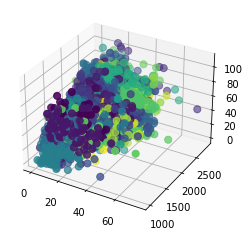

In [18]:
# plt.scatter(X[:, 0], X[:, 1], c=labels,
#             s=50, cmap='viridis');
ax = plt.axes(projection='3d')
ax.scatter3D(dataset['Condition_Rank'], dataset['Zip'], dataset['Age'], c=labels, s=50, cmap='viridis')

In [19]:
joblib.dump(model, 'model.joblib')

['model.joblib']